In [1]:
#Import Statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
#Read file

raw_df = pd.read_csv('C:/Users/airshu23/Desktop/Capstone2/ICPSR_20520/DS0001/Data.tsv', sep='\t')

C:\Users\airshu23\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,16,17,19,20,22,23,24,25,26,52,68,102,108,116,118,120,122,124,130,136,137,138,523,525,543,546,612,664) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print (raw_df.shape)

print (raw_df.columns)


(5262, 665)
Index(['CASEID', 'V1', 'V2', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11',
       ...
       'V448G', 'V448H', 'V448I', 'V448J', 'V448K', 'V448L', 'V448M', 'V448N',
       'V449', 'V450'],
      dtype='object', length=665)


In [6]:
raw_df.head()

,CASEID,V1,V2,V4,V5,V7,V8,V9,V10,V11,...,V448G,V448H,V448I,V448J,V448K,V448L,V448M,V448N,V449,V450
0,1,257,1,7,8,1,,44,85,,...,0,0,0,0,0,0,0,0,2,13
1,2,2347,1,13,9,1,,102,,,...,0,0,0,0,0,0,0,0,3,12
2,3,860,1,12,9,2,1,78,69,1,...,1,1,1,0,0,0,0,0,2,2
3,4,5178,3,20,9,1,,82,78,1,...,0,0,0,0,0,0,1,0,1,5
4,5,1984,1,12,9,1,,101,78,2,...,0,0,1,1,0,0,1,0,1,4


In [7]:
# Establish index to CASEID
raw_df.set_index('CASEID', inplace = True)

In [8]:
#testing how blank values are represented
print (type(raw_df.loc[1, 'V8']))

<class 'str'>


In [9]:
print (raw_df['V8'][5] == ' ')     ## one empty space

True


In [10]:
# copy into new dataframe for modification
df = raw_df.copy()

In [11]:
# get columns for entire dataset
variables = list(df.columns)


## Data Wrangling

In [12]:
# convert all entries to string so that the function in the next cell runs properly
df[variables] = df[variables].astype(str)

In [13]:
#check for alphabet in column values
def check(series):
    
    if series.str.contains('[a-z]', regex = True).sum() > 0:
        return True
    return False

# list of columns to drop from df
dropped = []


In [14]:
# gather all columns with non-digit strings (a-z)
for var in variables:
    if check(df[var]) == True:
        dropped.append(var)

In [15]:
print(dropped)

['V401A', 'V401B', 'V402B', 'V404A', 'V407B', 'V408F', 'V408I', 'V408L', 'V408O', 'V409B', 'V409C', 'V410', 'V410B', 'V414A1', 'V415A1', 'V416A', 'V417A', 'V418A', 'V425A', 'V427A', 'V436A', 'V438A', 'V439A', 'V439B', 'V443A']


In [16]:
# remove variables with alphabet characters
df.drop(dropped, inplace = True, axis=1)


In [17]:
remaining_columns = list(df.columns)

In [18]:
# get index of first 2005 variable
first_2005 = remaining_columns.index('V400')

# get index of last 2005 variable
last_2005 = remaining_columns.index('V450')

In [19]:
#all variables from 2005 followup
variables_2005 = set(remaining_columns[first_2005:last_2005+1])

In [20]:
#variables to keep from 2005 followup
#V411 - work status
#v415E - job prestige score
#V421 - total individual monthly earnings
#V422 - total household income/year
#v426A - expected occupation (at age 30) prestige score

keep_2005 = set(['V411', 'V415E', 'V421', 'V422', 'V426A', 'V448M'])

In [21]:
# remove 2005 variables except V411, V415E, V421, V426A, V448M
drop_2005 = list(variables_2005.difference(keep_2005))

In [22]:
#drop from column headers above
df1 = df.drop(drop_2005, axis=1)

print (df1.shape)


(5262, 545)


In [23]:
df1.head(5)

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,C17,C18,C19,C20,V411,V415E,V421,V422,V426A,V448M
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1,,44,85,,1,...,3.3,5,2,,2,57,1800,7,,0
2,2347,1,13,9,1,,102,,,1,...,3.3,4.67,1.33,3,8,,850,2,,0
3,860,1,12,9,2,1,78,69,1,1,...,3.6,1.67,2,2,1,34,1054,8,56,0
4,5178,3,20,9,1,,82,78,1,1,...,,,,,3,,1900,9,51,1
5,1984,1,12,9,1,,101,78,2,1,...,4,3.67,1.33,2,1,51,5000,6,,1


In [24]:
#get columns from df1

cols = list(df1.columns)

# convert entries to numeric
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')


In [25]:
df1.head()

,V1,V2,V4,V5,V7,V8,V9,V10,V11,V13,...,C17,C18,C19,C20,V411,V415E,V421,V422,V426A,V448M
CASEID,,,,,,,,,,,,,,,,,,,,,
1,257,1,7,8,1.0,NaN,44.0,85.0,NaN,1.0,...,3.3,5.00,2.00,NaN,2.0,57.0,1800.0,7.0,NaN,0.0
2,2347,1,13,9,1.0,NaN,102.0,NaN,NaN,1.0,...,3.3,4.67,1.33,3.0,8.0,NaN,850.0,2.0,NaN,0.0
3,860,1,12,9,2.0,1.0,78.0,69.0,1.0,1.0,...,3.6,1.67,2.00,2.0,1.0,34.0,1054.0,8.0,56.0,0.0
4,5178,3,20,9,1.0,NaN,82.0,78.0,1.0,1.0,...,NaN,NaN,NaN,NaN,3.0,NaN,1900.0,9.0,51.0,1.0
5,1984,1,12,9,1.0,NaN,101.0,78.0,2.0,1.0,...,4.0,3.67,1.33,2.0,1.0,51.0,5000.0,6.0,NaN,1.0


In [26]:
# remove rows that do not have entries for V421 (total monthly earnings)

df2 = df1[pd.notnull(df1['V421'])]

# removing outlier salaries for scatterplot
df2_mod = df2[df2['V421'] < 7500]

In [27]:
# remove rows that do not have entries for V411 (work status)

df3 = df1[pd.notnull(df1['V411'])]
print(df3.shape)

(3299, 545)


## Exploratory Data Analysis


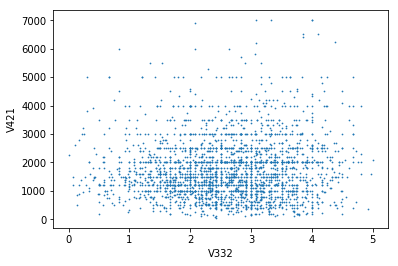

In [28]:
#gpa vs monthly earnings later in life
ax1 = df2_mod.plot.scatter(x='V332', y='V421', s=0.5)

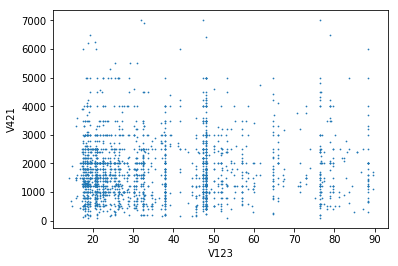

In [29]:
#father's SEI (socio-economic index) score vs monthly earnings

ax2 = df2_mod.plot.scatter(x='V123', y='V421', s=0.5)

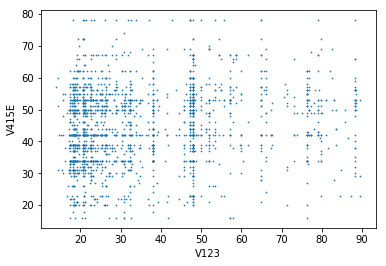

In [30]:
#father's SEI (socio-economic index) score vs current job prestige score

ax2 = df1.plot.scatter(x='V123', y='V415E', s=0.5)

In [31]:
#public versus private - median earnings

school_type = df1.groupby('C2').agg({'V421':'median'})

In [32]:
school_type.index = ['Public School', 'Private School']

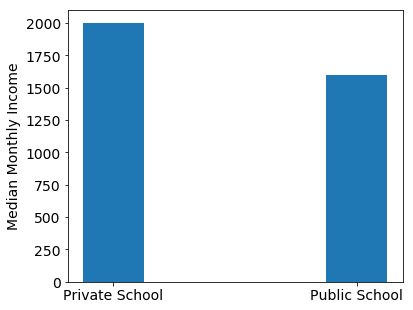

In [33]:
plt.figure(figsize=(6,5))
plt.bar(school_type.index, school_type['V421'].values, width = .25)
plt.ylabel('Median Monthly Income', fontsize = 14)
plt.xticks(fontsize= 14 )
plt.yticks(fontsize= 14 )
plt.show()

In [34]:
# Safety at school 1 - low, 4 - high
school_safety = df1.groupby('V211').agg({'V421':'median'})

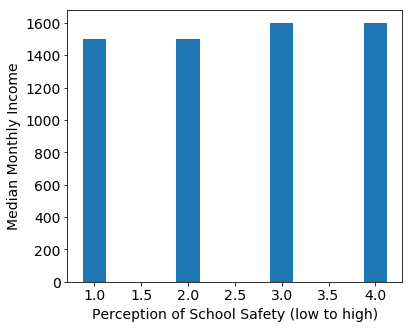

In [35]:
#scatterplot of respondent's 

plt.figure(figsize=(6,5))
plt.bar(school_safety.index, school_safety['V421'].values, width = .25)
plt.ylabel('Median Monthly Income', fontsize = 14)
plt.xlabel('Perception of School Safety (low to high)', fontsize = 14)
plt.xticks(fontsize= 14 )
plt.yticks(fontsize= 14 )
plt.show()

## Pre-processing and Dimensionality Reduction

In [36]:
# Examine missing values

test = df2.isna().sum() / len(df2)


In [37]:
testing = test[test>=0.5]

print(testing)

V8       0.810603
V10      0.518632
V14      0.962735
V34A     0.930465
V34B     0.980023
V39A     0.927776
V39B     0.976181
V46      0.911256
V47      0.921629
V48      0.920861
V74A     0.504418
V74B     0.504418
V74C     0.504418
V74D     0.504418
V74E     0.504418
V74G     0.504418
V74H     0.504418
V74I     0.504418
V74K     0.504418
V74L     0.504418
V74M     0.602382
V74N     0.602382
V74O     0.602382
V74P     0.602382
V74Q     0.602382
V74R     0.602382
V74S     0.602382
V74T     0.602382
V74U     0.581637
V87      0.765271
           ...   
P79      0.540914
P80      0.766039
P81      0.537073
P82      0.591241
P83      0.888974
P85      0.764118
P86      0.522858
P88      0.597388
P90      0.595467
P91      0.593546
P100     0.523242
P101     0.615828
P102     0.500960
P103     0.547445
P104     0.549750
P105     0.519017
P106     0.548214
P122     0.548982
P124     0.584326
P130A    0.513638
P130B    0.628121
P130C    0.662697
P130D    0.682674
P130E    0.686900
P134     0

In [66]:
below50 = list(testing.index.values)

In [67]:
dropped = below50 + ['V411', 'V415E', 'V422', 'V426A', 'V448M']

In [68]:
print(dropped)

['V8', 'V10', 'V14', 'V34A', 'V34B', 'V39A', 'V39B', 'V46', 'V47', 'V48', 'V74A', 'V74B', 'V74C', 'V74D', 'V74E', 'V74G', 'V74H', 'V74I', 'V74K', 'V74L', 'V74M', 'V74N', 'V74O', 'V74P', 'V74Q', 'V74R', 'V74S', 'V74T', 'V74U', 'V87', 'V221', 'V246', 'V247', 'V248', 'V287', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P24', 'P25', 'P26B', 'P27B', 'P29A', 'P29B', 'P29C', 'P29D', 'P30', 'P32', 'P33A', 'P35', 'P36', 'P37', 'P38', 'P39A', 'P40', 'P41A', 'P42', 'P43A', 'P44', 'P45A', 'P45B', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P53A', 'P53B', 'P53C', 'P53D', 'P54', 'P55', 'P56', 'P59A', 'P59B', 'P59C', 'P61', 'P63', 'P64', 'P65', 'P67', 'P68A', 'P69', 'P70', 'P71', 'P72', 'P74A', 'P74B', 'P74C', 'P75A', 'P75B', 'P75C', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81', 'P82', 'P83', 'P85', 'P86', 'P88', 'P90', 'P91', 'P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P122', 'P124', 'P130A', 'P130B', 'P130C', 'P130D', 'P130E', 'P134', 'P138', 'P139', 'P142', 'P143', 'P144', 'V411', 'V4

In [69]:
# dropping above columns

df2_vers1 = df2.drop(dropped, axis = 1)

In [70]:
# imputing values for missing entries

df2_vers2 = df2_vers1.fillna(df2_vers1.mean())

In [71]:
# get train-test split

X = df2_vers2.drop('V421', axis = 1)
y = df2_vers2['V421']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
print (X_train.shape)

(1952, 409)


In [75]:
# get most important attributes

selForestFit = ExtraTreesRegressor(n_estimators = 150, random_state= 27).fit(X_train, y_train)



In [77]:
importances = selForestFit.feature_importances_


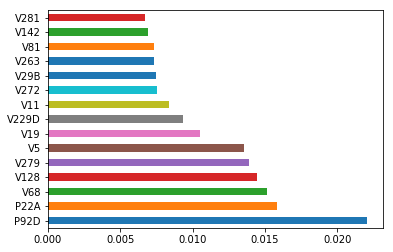

In [80]:
feat_importances = pd.Series(importances, index= X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Preliminary Model

In [99]:
print(feat_importances.nlargest(15))

P92D     0.022046
P22A     0.015868
V68      0.015178
V128     0.014487
V279     0.013892
V5       0.013546
V19      0.010502
V229D    0.009342
V11      0.008338
V272     0.007563
V29B     0.007470
V263     0.007334
V81      0.007312
V142     0.006947
V281     0.006684
dtype: float64


In [90]:
# top 25 in terms of importance as derived from ExtraTreesRegressor
top25 = list(feat_importances.nlargest(25).index)

X_train_version1 = X_train[top25]
X_test_version1 = X_test[top25]

In [100]:
#instantiate random forest regressor
rf = RandomForestRegressor(max_depth= 5, random_state=23, n_estimators=100)

# Fit the regressor to the training data
rf.fit(X_train_version1, y_train)

# Compute and print R^2 
print("R^2: {}".format(rf.score(X_test_version1, y_test)))

R^2: -0.056324704039752316
